# 2.6.3 Regresión

**Gaussiana condicional:** $\quad p(y\mid \boldsymbol{x};\boldsymbol{\theta})=\mathcal{N}(y\mid f_{\boldsymbol{\mu}}(\boldsymbol{x};\boldsymbol{\theta}), f_{\sigma}(\boldsymbol{x};\boldsymbol{\theta})^2)$

**Regresión homocedástica:** $\;$ Gaussiana condicional con $\;f_{\sigma}(\boldsymbol{x};\boldsymbol{\theta})^2=\sigma^2\;$ fija

**Regresión (homocedástica) lineal:** $\;$ regresión homocedástica de $\boldsymbol{\mu}$ lineal con $\boldsymbol{x}$, $\,p(y\mid \boldsymbol{x};\boldsymbol{\theta})=\mathcal{N}(y\mid \boldsymbol{w}^t\boldsymbol{x}+b, \sigma^2)$

**Regresión heterocedástica lineal:** $\;$ Gaussiana condicional de $\boldsymbol{\mu}$ y $\sigma$ lineales con $\boldsymbol{x}$, $\,p(y\mid \boldsymbol{x};\boldsymbol{\theta})=\mathcal{N}(y\mid \boldsymbol{w}_{\mu}^t\boldsymbol{x}+b_{\mu}, (\sigma_+(\boldsymbol{w}_{\sigma}^t\boldsymbol{x})+b_{\sigma})^2)$

**Ejemplo 1d:** $\;x\in[-10, 10],\,w_{\mu}=1,\,b_{\mu}=0,\,w_{\sigma}=0.2,\,b_{\sigma}=1$

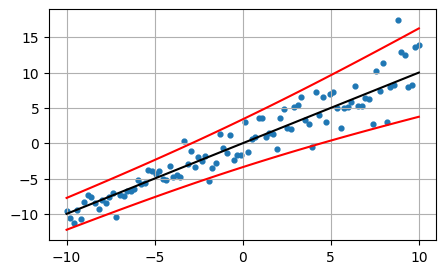

In [1]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.stats import norm
X = np.linspace(-10, 10, 100); wmu = 1; bmu = 0; wsigma = .2; bsigma = 1
fig, ax = plt.subplots(1, 1, figsize=(5, 3)); ax.set_xticks(np.linspace(-10, 10, 5)); ax.grid()
M = X * wmu + bmu; S = np.log1p(np.exp(M * wsigma)) + bsigma
ax.plot(X, M, '-k', X, M-2*S, '-r', X, M+2*S, '-r')
Y = M + S * norm.rvs(size=len(X)); ax.scatter(X, Y, s=12);

**Ejemplo 2d:** $\;\boldsymbol{x}\in[-1, 1]^2,\,\boldsymbol{w}_{\mu}=(0, 2)^t,\,b_{\mu}=0,\,\boldsymbol{w}_{\sigma}=(2, 0),\,b_{\sigma}=0$

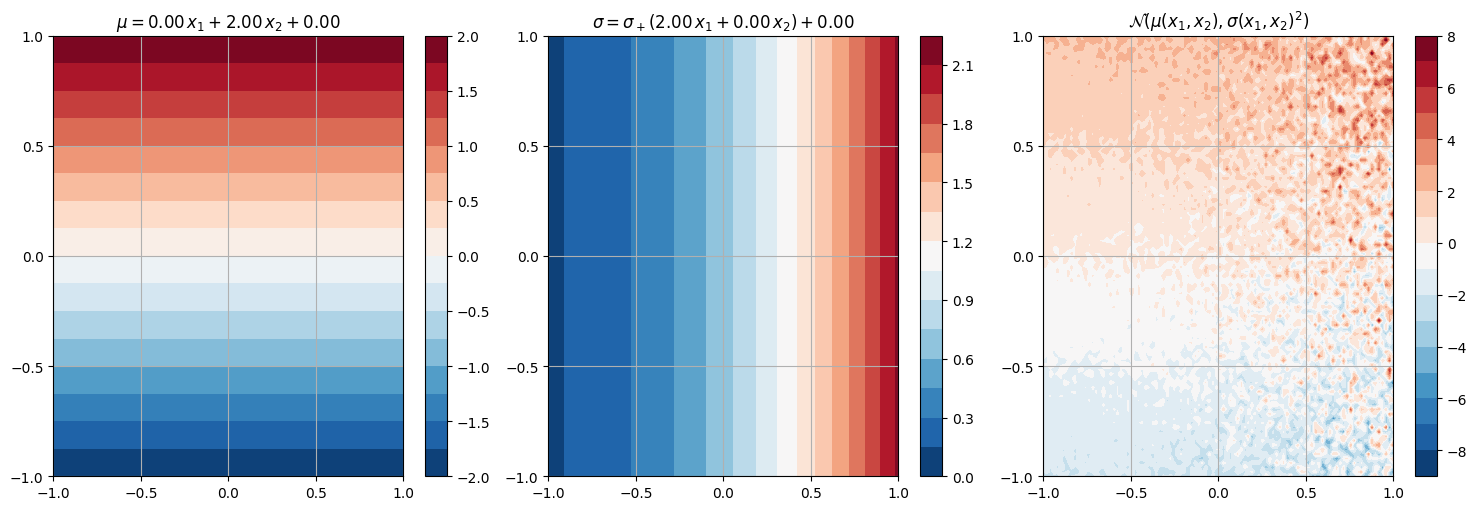

In [2]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.stats import norm
x1, x2 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
X = np.c_[np.ravel(x1), np.ravel(x2)]
wmu = np.array([0, 2]); bmu = 0; wsigma = np.array([2, 0]); bsigma = 0
mu = X @ wmu + bmu; sigma = np.log1p(np.exp(X @ wsigma)) + bsigma
fig, axs = plt.subplots(1, 3, figsize=(15, 5)); fig.tight_layout()
for i, ax in enumerate(axs.flat):
    ax.set_xticks(np.linspace(-1, 1, 5)); ax.set_yticks(np.linspace(-1, 1, 5)); ax.grid();
ax = axs[0]; ax.set_title('$\mu={:.2f}\,x_1{:+.2f}\,x_2{:+.2f}$'.format(wmu[0], wmu[1], bmu))
cp = ax.contourf(x1, x2, mu.reshape(x1.shape), 15, cmap='RdBu_r'); plt.colorbar(cp, ax=ax);
ax = axs[1]; ax.set_title('$\sigma=\sigma_+({:.2f}\,x_1{:+.2f}\,x_2){:+.2f}$'.format(wsigma[0], wsigma[1], bsigma))
cp = ax.contourf(x1, x2, sigma.reshape(x1.shape), 15, cmap='RdBu_r'); plt.colorbar(cp, ax=ax);
rvs = norm().rvs(mu.shape) * sigma + mu # a random number at each position
ax = axs[2]; ax.set_title('$\mathcal{N}(\mu(x_1, x_2),\sigma(x_1, x_2)^2)$')
cp = ax.contourf(x1, x2, rvs.reshape(x1.shape), 15, cmap='RdBu_r'); plt.colorbar(cp, ax=ax);